# Crear un array de 5 elementos. Cada elemento es un template ERP completo y distintos entre ellos. Cada templateERP debe alterarse multiplicándolo por valores random entre 0.5ERP y 1.5ERP.

# El ejercicio que hice es crear un vector aleatorio vCoefERP = [0, 30] y llamarlo en la función cada vez que lo necesito coefERP = random.choice(vCoefERP).  
# La idea es hacer PREVIO a esto, lo mismo pero con un template ERP completo.

In [ ]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  
import random

#color = ['green', 'blue','red','cyan', 'magenta', 'yellow','red','red']     # Paleta de colores para diferenciar las ondas
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# Funciones DrugSignal
#-----------------------------------------------------------------------
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            coefERP = random.choice(vCoefERP)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return signal

def ds2(s2, t_flash):
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            #signal2[t_flash[i,0]-150:t_flash[i,0]+250-150,:] += (erptemplate1*100)
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
            s2[t_flash[i,0]-150:t_flash[i,0]+250-150,:]
    return s2
#-----------------------------------------------------------------------
# Carga de archivos para proceso de señales
#-----------------------------------------------------------------------
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete(erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete(erptemplate2, range(0,256,43),0)
df_erptemplate1 = a_fun.to_df(erptemplate1)

vCoefERP = [0, 30]

coefERP = random.choice(vCoefERP)
*coefERP

print("coefERP:", coefERP)

DrugERPtemplate = erptemplate2
mi_array = [0,1,10,2.5,30,3.5,4,4.5]
for i in range(0,4):
    for j in range(0,250):
        for k in range(0,7):
            DrugERPtemplate[j,k] = DrugERPtemplate[j,k]*mi_array[k]

df_DrugERPtemplate = a_fun.to_df(DrugERPtemplate)

#p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream
p300subject25 = scipy.io.loadmat('./dataset/itba/P300S01.mat')  


t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

signal = p300subject25['data'][0][0][0]    
signal = DrugSignal(signal, t_flash)
df_signal = a_fun.to_df(signal)

s2 = p300subject25['data'][0][0][0]    
s2 = ds2(s2, t_flash)
df_s2 = a_fun.to_df(s2)

ch_names=['Fz','Cz','P3','Pz','P4','PO7','PO8', 'Oz']                   # Los nombres de los canales

In [2]:
df_erptemplate1

,0,1,2,3,4,5,6,7,sample
0,-1.020693,-0.586228,0.215272,0.297523,0.446650,-0.022604,1.090090,0.168238,0
1,-0.968875,-0.563106,0.173880,0.247861,0.401001,-0.041949,1.081391,0.135391,1
2,-0.913207,-0.535921,0.131500,0.193292,0.350855,-0.061824,1.064240,0.098018,2
3,-0.853245,-0.504147,0.089699,0.135484,0.297906,-0.081188,1.039851,0.057203,3
4,-0.788539,-0.467307,0.049984,0.076135,0.243860,-0.099118,1.009518,0.014067,4
...,...,...,...,...,...,...,...,...,...
245,-1.379825,-1.690367,-1.586896,-1.145649,-1.527721,-1.123797,-1.339917,-0.956375,245
246,-1.385939,-1.704585,-1.626058,-1.220612,-1.548023,-1.156205,-1.409536,-0.997275,246
247,-1.389672,-1.719963,-1.668671,-1.296602,-1.571718,-1.195394,-1.482131,-1.040875,247
248,-1.390302,-1.735533,-1.713800,-1.373174,-1.598160,-1.241082,-1.557424,-1.087343,248


In [3]:
df_DrugERPtemplate

,0,1,2,3,4,5,6,7,sample
0,-0.0,-1.807292,-0.945035,2.586501,32.298818,-0.638218,4.763256,1.075546,0
1,-0.0,-1.789698,-1.268195,2.566286,32.590778,-0.756232,4.827744,1.054228,1
2,-0.0,-1.761577,-1.606411,2.525562,32.683775,-0.885252,4.850055,1.019644,2
3,-0.0,-1.723454,-1.960604,2.463944,32.572129,-1.025804,4.830953,0.971995,3
4,-0.0,-1.675845,-2.329605,2.381658,32.256052,-1.177481,4.772038,0.911870,4
...,...,...,...,...,...,...,...,...,...
245,-0.0,-1.452850,-3.183706,0.240263,12.868336,-1.390996,1.808230,-0.584245,245
246,-0.0,-1.323635,-1.468278,0.415762,17.414040,-0.722668,2.160397,-0.471753,246
247,-0.0,-1.189700,0.180646,0.565287,21.613738,-0.069994,2.460911,-0.365065,247
248,-0.0,-1.051598,1.757732,0.689794,25.453205,0.563648,2.708586,-0.264288,248


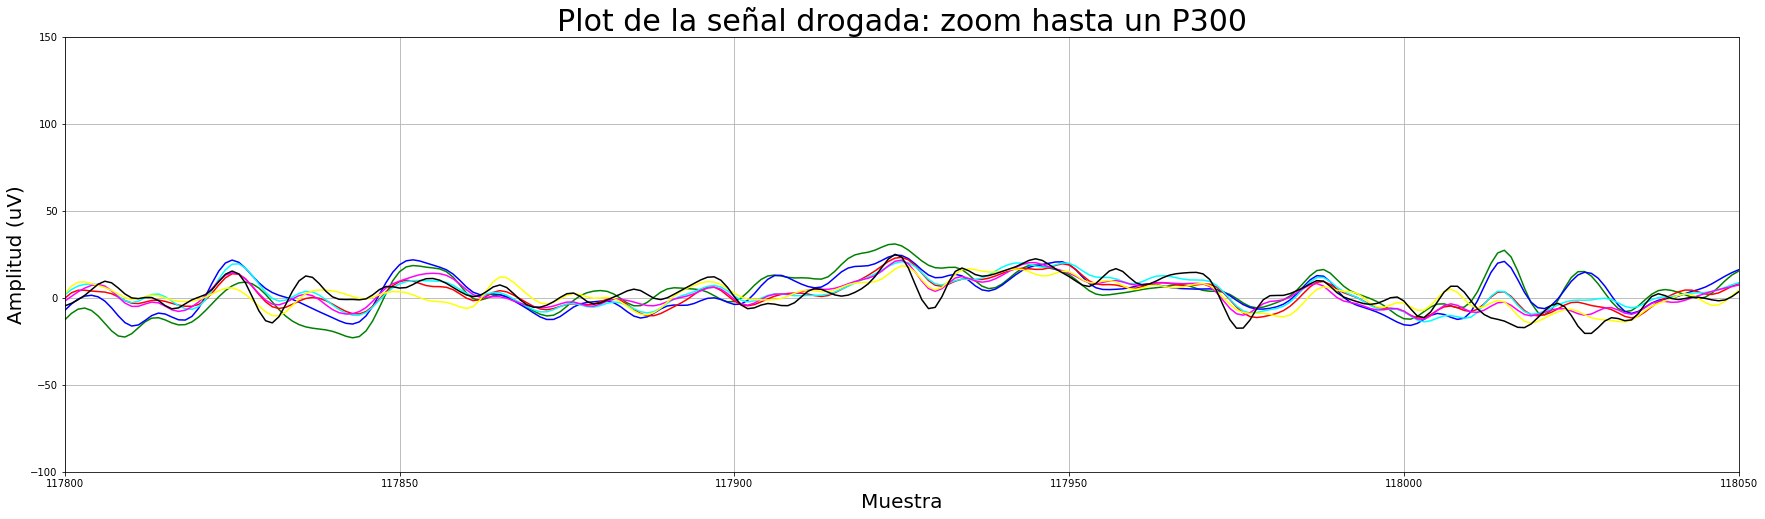

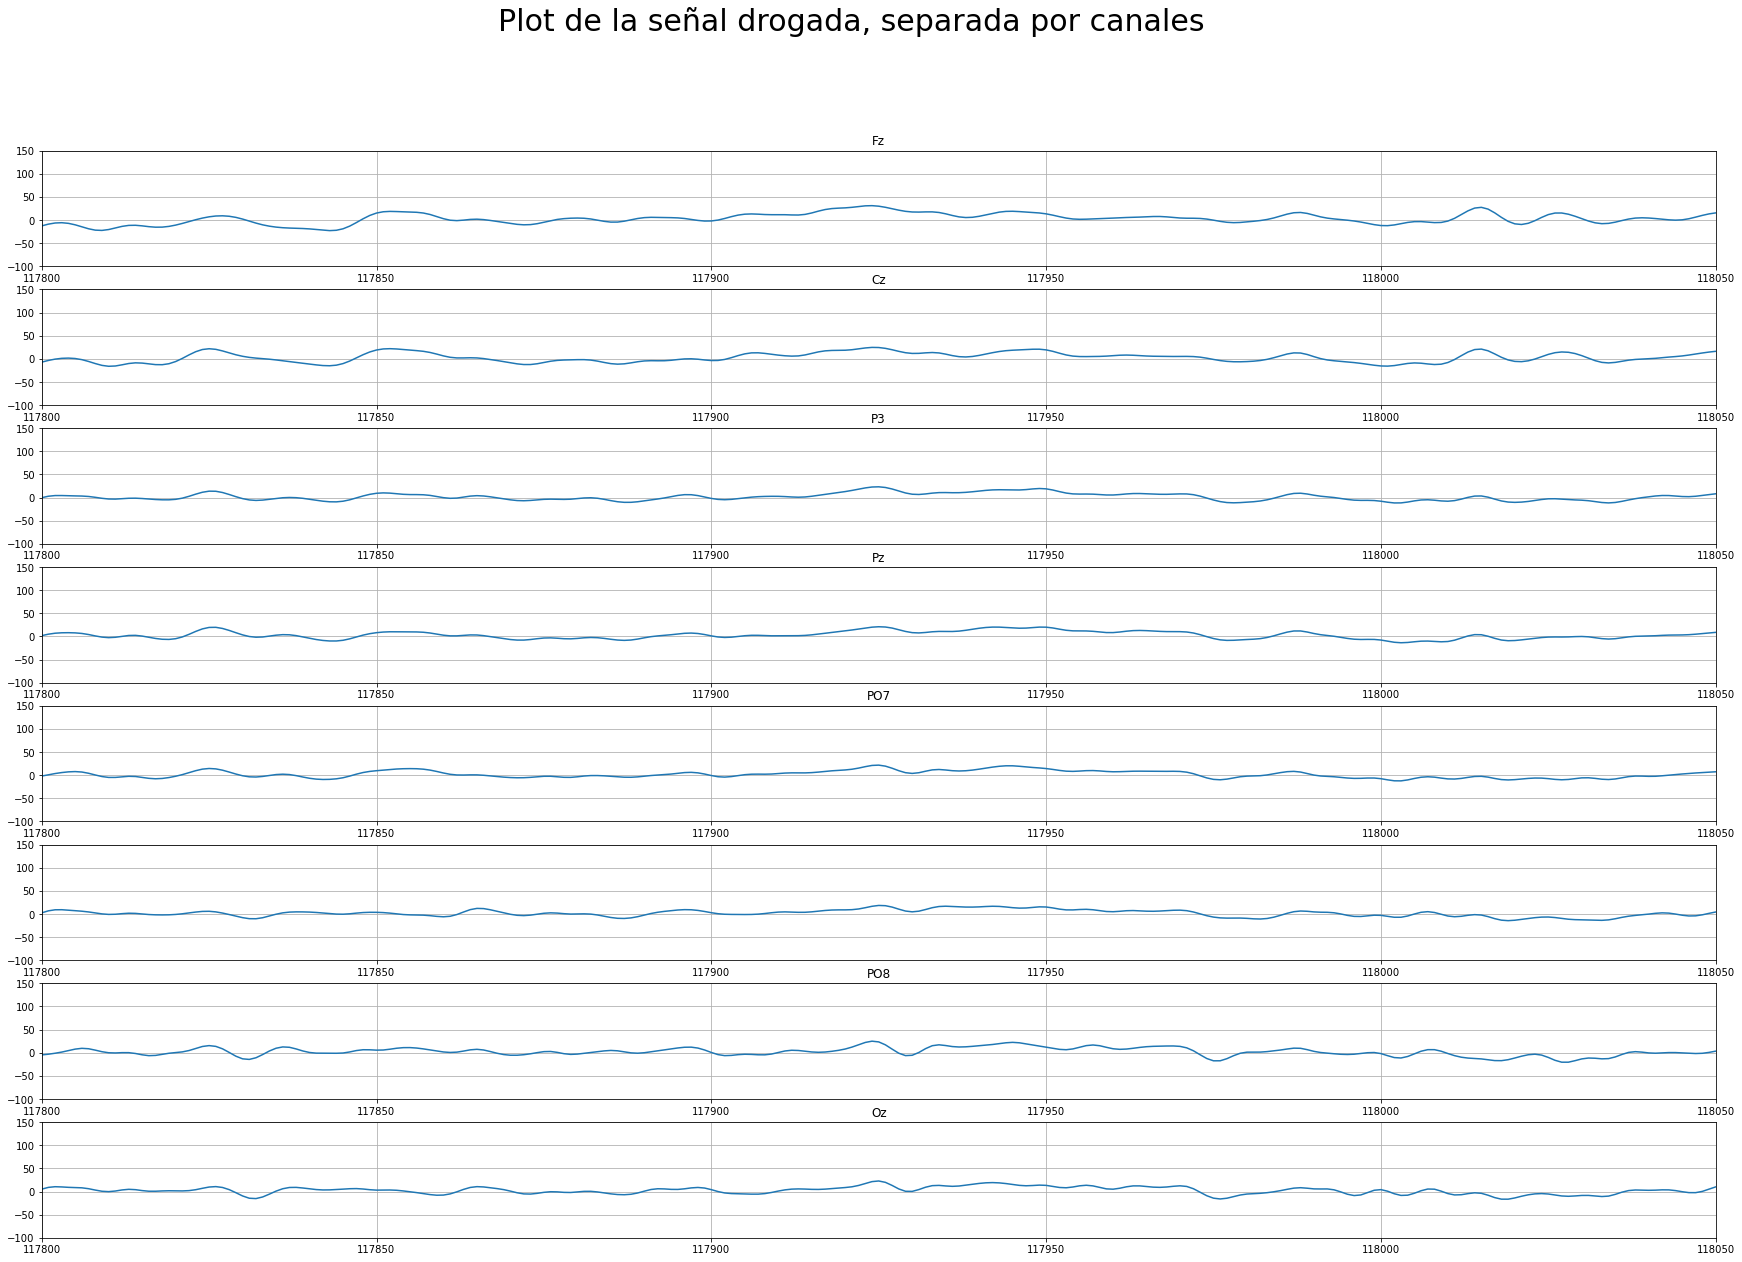

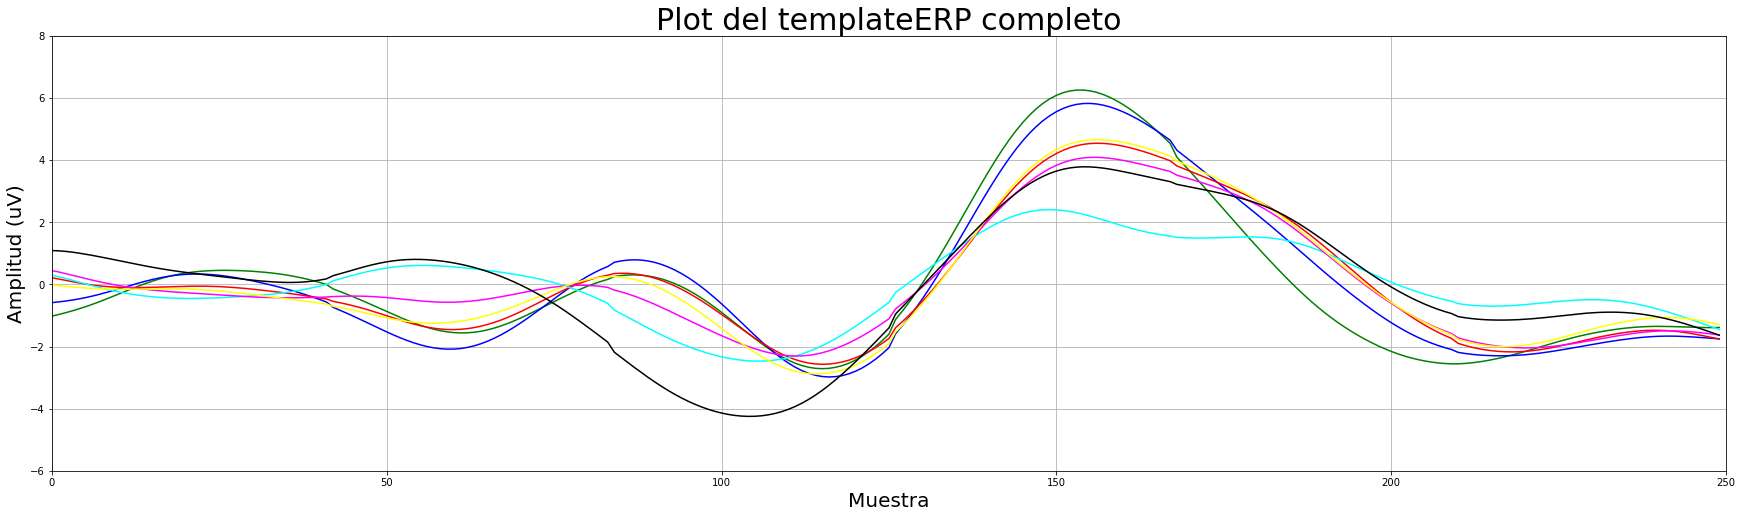

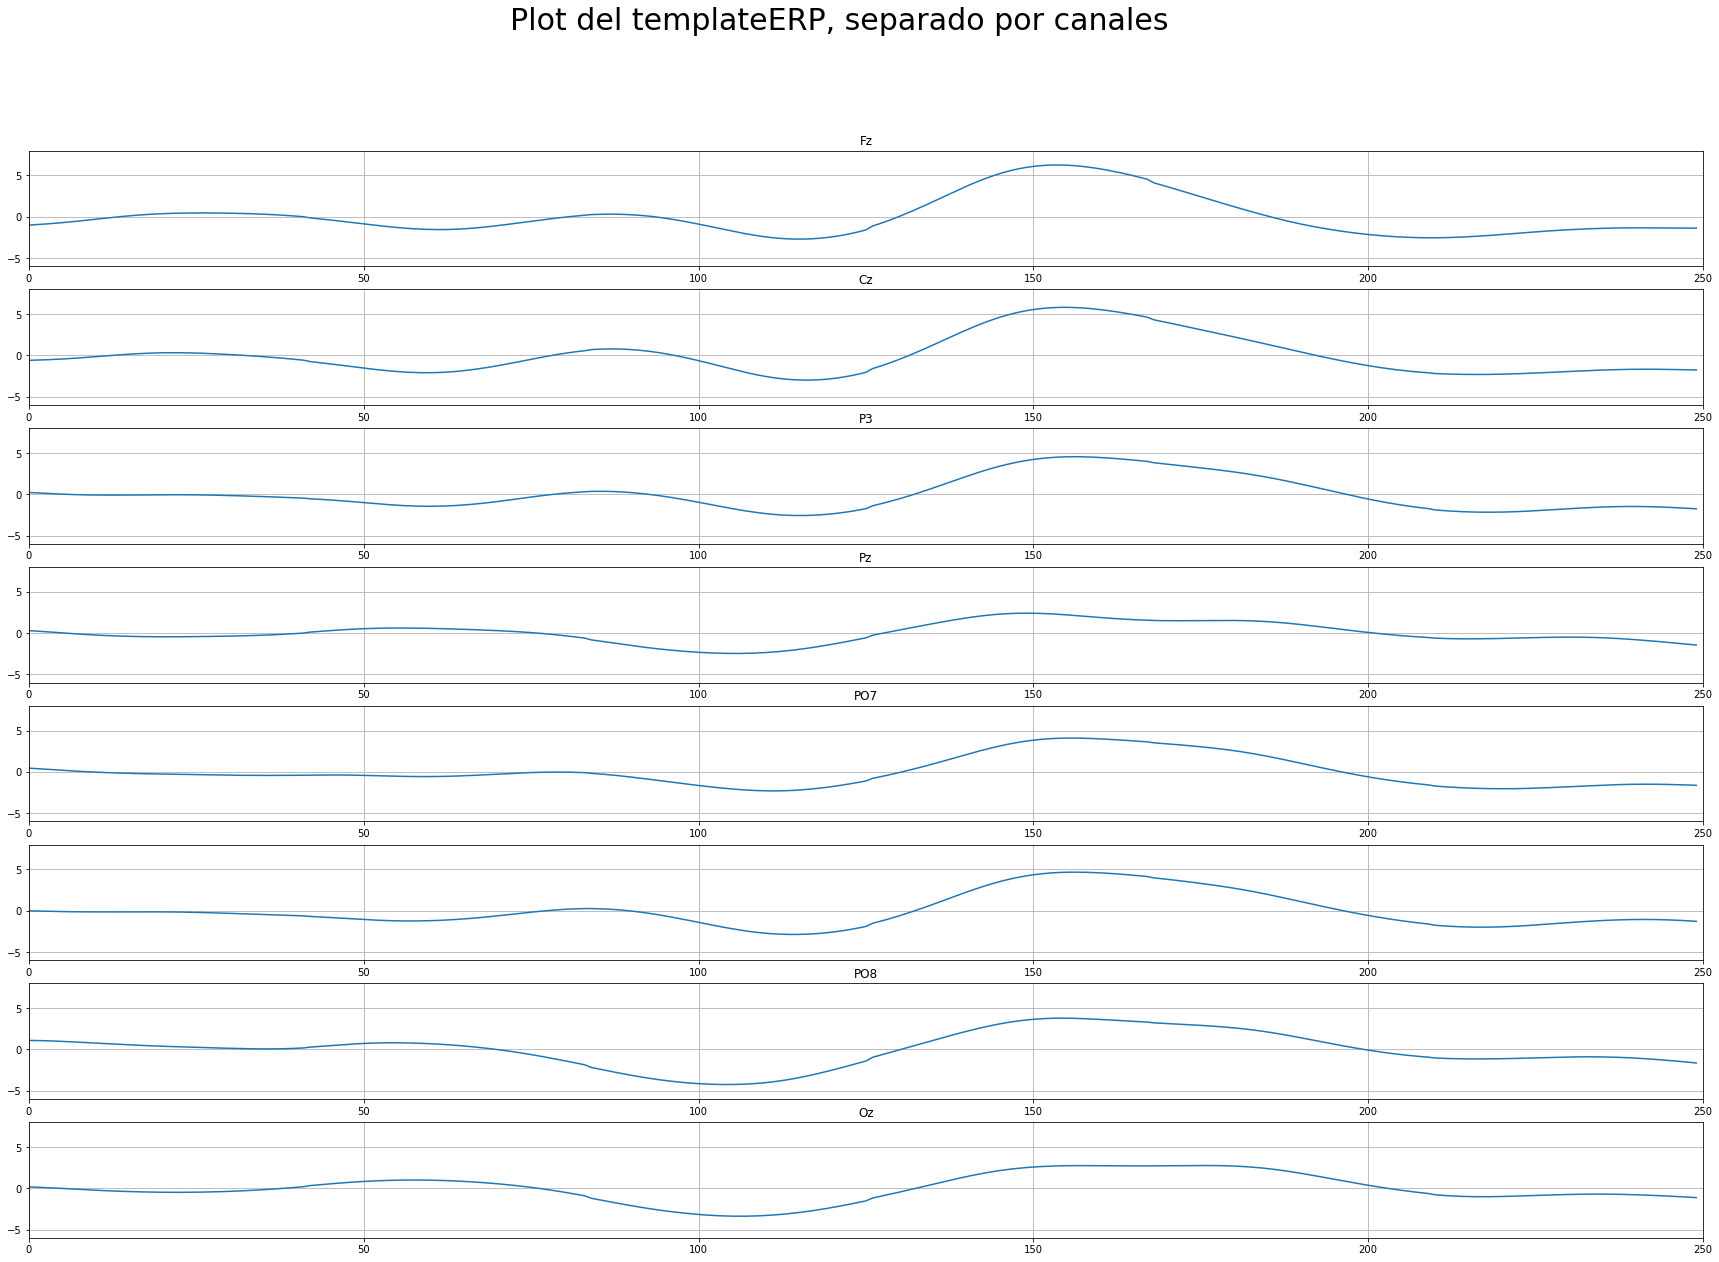

"\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[0])\naxes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.grid(), plt.show()\n\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[3])\naxes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.grid(), plt.show()\n\nplt.figure(figsize=(30,8))\naxes = plt.gca()\nplt.plot(df_t_flash['sample'], df_t_flash[3])\naxes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)\naxes.set_xlabel(xlabel), axes.set_ylabel(ylabel)\naxes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)\nplt.xlim([0,100]), plt.ylim([0.9,2.1])\nplt.grid(), plt.show()\n"

In [4]:
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada completa.
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('P300, "sujeto25". Señal drogada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.grid(), plt.show()
'''
#-----------------------------------------------------------------------
# Plot de la señal drogada: zoom hasta un P300
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                     
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Plot de la señal drogada: zoom hasta un P300'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
# plt.savefig("./a_images/DrugSignal_p300subject25[data][0][0][0].jpg")
plt.axis((117800,118050,-100,150))   
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot de la señal drogada, separada por canales
#-----------------------------------------------------------------------
xlim_general=([117800,118050])
ylim_general=([-100,150])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot de la señal drogada, separada por canales", fontsize=30)

ax0.plot(df_signal['sample'], df_signal.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_signal['sample'], df_signal.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_signal['sample'], df_signal.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_signal['sample'], df_signal.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_signal['sample'], df_signal.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_signal['sample'], df_signal.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_signal['sample'], df_signal.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_signal['sample'], df_signal.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP completo
#-----------------------------------------------------------------------
plt.figure(figsize=(30,8))                                          
axes = plt.gca()                                                    
for i in range(0,7):
    plt.plot(df_erptemplate1['sample'], df_erptemplate1[i], color[i])
axes.set_title('Plot del templateERP completo'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/ERPTemplate.jpg")
plt.axis((0,250,-6,8))  #plt.xlim([0,100]), plt.ylim([0.9,2.1])                                            
plt.grid(), plt.show()
#-----------------------------------------------------------------------
# Plot del templateERP, separado por canales
#-----------------------------------------------------------------------
xlim_general=([0,250])
ylim_general=([-6,8])
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows=8, ncols=1,figsize=(30,20))
fig.suptitle("Plot del templateERP, separado por canales", fontsize=30)

ax0.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,0], label='0') 
ax0.set_xlim(xlim_general), ax0.set_ylim(ylim_general), ax0.set_title(ch_names[0]), ax0.grid()

ax1.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,1], label='1')
ax1.set_xlim(xlim_general), ax1.set_ylim(ylim_general), ax1.set_title(ch_names[1]), ax1.grid()

ax2.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,2], label='2')
ax2.set_xlim(xlim_general), ax2.set_ylim(ylim_general), ax2.set_title(ch_names[2]), ax2.grid()

ax3.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,3], label='3')
ax3.set_xlim(xlim_general), ax3.set_ylim(ylim_general), ax3.set_title(ch_names[3]), ax3.grid()

ax4.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,4], label='4')
ax4.set_xlim(xlim_general), ax4.set_ylim(ylim_general), ax4.set_title(ch_names[4]), ax4.grid()

ax5.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,5], label='5')
ax5.set_xlim(xlim_general), ax5.set_ylim(ylim_general), ax4.set_title(ch_names[5]), ax5.grid()

ax6.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,6], label='6')
ax6.set_xlim(xlim_general), ax6.set_ylim(ylim_general), ax6.set_title(ch_names[6]), ax6.grid()

ax7.plot(df_erptemplate1['sample'], df_erptemplate1.iloc[:,7], label='7')
ax7.set_xlim(xlim_general), ax7.set_ylim(ylim_general), ax7.set_title(ch_names[7]), ax7.grid()

plt.show()


'''
plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[0])
axes.set_title('Señal t_flash[0]: Incremental'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Señal t_flash[3] completa'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.grid(), plt.show()

plt.figure(figsize=(30,8))
axes = plt.gca()
plt.plot(df_t_flash['sample'], df_t_flash[3])
axes.set_title('Zoom señal t_flash[3]'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([0,100]), plt.ylim([0.9,2.1])
plt.grid(), plt.show()
'''

En la siguientes gráficas modifico el erptemplate1 multiplicándolo por 50 dentro de la función DrugSignal.  
El objetivo es visualizar en dónde afecta la señal.    

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])                                                           
axes.set_title('DrugSignal p300subject25[data][0][0][0] + ERPTemplate amplificado'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([8550,8950]), plt.ylim([-600,800])
plt.savefig("./a_images/DrguSignal_p300subject25[data][0][0][0]_ERPTemplatex100_zoom.jpg")
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])              
axes.set_title('Señal p300subject25[data][0][0][0] drogada con el ERPTemplate'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.savefig("./a_images/DrguSignal2.jpg")
#plt.xlim([7500,15500]), plt.ylim([-300,300])
plt.grid(), plt.show()

plt.figure(figsize=(30,8))                           
axes = plt.gca()
for i in range(0,7):
    plt.plot(df_s2['sample'], df_s2[i], color[i])
axes.set_title('Zoom Señal anterior y desfasada'), axes.title.set_size(30)
axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
axes.xaxis.label.set_size(20), axes.yaxis.label.set_size(20)
plt.xlim([228000,236000]), plt.ylim([-800,1000])
plt.savefig("./a_images/DrguSignal2_zoom.jpg")
plt.grid(), plt.show()